In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("C:/Users/Manoj/Onedrive/Desktop/Python/Kaggle/Titanic Competition/train.csv")
test = pd.read_csv("C:/Users/Manoj/Onedrive/Desktop/Python/Kaggle/Titanic Competition/test.csv")

In [3]:
df_train = train.copy()
df_train.shape

(891, 12)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
col_drop = ["PassengerId", "Name", "Ticket"]
df_train = df_train.drop(col_drop, axis = 1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
df_train[df_train["Age"].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [8]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [9]:
df_train["Age"] = df_train["Age"].fillna(df_train.groupby(["Sex"])["Age"].transform('mean'))

In [10]:
df_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df_train["Embarked"] = df_train["Embarked"].fillna('S')

In [12]:
df_train["Cabin"] = df_train["Cabin"].fillna(0)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,0,S


In [13]:
df_train["Cabin_new"] = np.where(df_train["Cabin"] == 0, 0,1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_new
0,0,3,male,22.0,1,0,7.2500,0,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,0,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,0,S,0


In [14]:
df_train = df_train.drop("Cabin", axis = 1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [15]:
df_train_new = pd.get_dummies(df_train, columns = ["Sex", "Embarked"], drop_first = True)
df_train_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_new,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [16]:
X = df_train_new.iloc[:,1:].values
y = df_train_new.iloc[:,0].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
ann = tf.keras.models.Sequential()

In [22]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [23]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [24]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [25]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
21/21 [==============================] - 0s 669us/step - loss: 0.7963 - accuracy: 0.3832
Epoch 2/100
21/21 [==============================] - 0s 749us/step - loss: 0.7609 - accuracy: 0.3847
Epoch 3/100
21/21 [==============================] - 0s 618us/step - loss: 0.7335 - accuracy: 0.3982
Epoch 4/100
21/21 [==============================] - 0s 621us/step - loss: 0.7126 - accuracy: 0.4596
Epoch 5/100
21/21 [==============================] - 0s 619us/step - loss: 0.6971 - accuracy: 0.5464
Epoch 6/100
21/21 [==============================] - 0s 666us/step - loss: 0.6839 - accuracy: 0.6168
Epoch 7/100
21/21 [==============================] - 0s 721us/step - loss: 0.6733 - accuracy: 0.6183
Epoch 8/100
21/21 [==============================] - 0s 657us/step - loss: 0.6619 - accuracy: 0.6602
Epoch 9/100
21/21 [==============================] - 0s 667us/step - loss: 0.6491 - accuracy: 0.6677
Epoch 10/100
21/21 [==============================] - 0s 716us/step - loss: 0.6368 - accura

In [27]:
y_pred_train = ann.predict(X_train)

In [29]:
y_train_new = y_train.reshape((-1))

In [30]:
y_train_new

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [31]:
y_pred_train_new = y_pred_train.reshape((-1))

In [32]:
y_pred_train_new

array([0.11226827, 0.16819459, 0.1207422 , 0.10928798, 0.8088957 ,
       0.11004043, 0.22596234, 0.11491209, 0.831483  , 0.4946887 ,
       0.59539866, 0.19794208, 0.12220341, 0.8998698 , 0.9178177 ,
       0.84636045, 0.1135594 , 0.16932788, 0.9670129 , 0.11425456,
       0.1118463 , 0.9710829 , 0.288529  , 0.78276676, 0.113617  ,
       0.11363223, 0.7628424 , 0.10934961, 0.13132665, 0.25246546,
       0.11076126, 0.10363546, 0.65507525, 0.7831544 , 0.12092572,
       0.07659465, 0.10565943, 0.113617  , 0.17050749, 0.1299428 ,
       0.34528244, 0.10616741, 0.24325898, 0.65160954, 0.2910247 ,
       0.21928167, 0.9656352 , 0.04271606, 0.15609059, 0.49565133,
       0.47854248, 0.6417072 , 0.11175489, 0.11327136, 0.11024252,
       0.7830753 , 0.46306068, 0.11073819, 0.78071404, 0.43624562,
       0.97239375, 0.11609113, 0.10983142, 0.4432615 , 0.14501217,
       0.11114925, 0.42551622, 0.11202228, 0.11785522, 0.6259079 ,
       0.8783335 , 0.94886804, 0.11093521, 0.11181486, 0.16193

In [33]:
pred_results = pd.DataFrame({'Actuals' : y_train_new, 'Pred_Prob' : y_pred_train_new})
pred_results.head()

,Actuals,Pred_Prob
0,0,0.112268
1,1,0.168195
2,0,0.120742
3,0,0.109288
4,1,0.808896


In [34]:
num = [float(x)/10 for x in range(10)]
for i in num:
    pred_results[i] = pred_results.Pred_Prob.map(lambda x:1 if x > i else 0)
pred_results.head(10)

,Actuals,Pred_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.112268,1,1,0,0,0,0,0,0,0,0
1,1,0.168195,1,1,0,0,0,0,0,0,0,0
2,0,0.120742,1,1,0,0,0,0,0,0,0,0
3,0,0.109288,1,1,0,0,0,0,0,0,0,0
4,1,0.808896,1,1,1,1,1,1,1,1,1,0
5,1,0.110040,1,1,0,0,0,0,0,0,0,0
6,0,0.225962,1,1,1,0,0,0,0,0,0,0
7,0,0.114912,1,1,0,0,0,0,0,0,0,0
8,1,0.831483,1,1,1,1,1,1,1,1,1,0
9,1,0.494689,1,1,1,1,1,0,0,0,0,0


In [35]:
# Creating the probability dataframe

from sklearn import metrics

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(pred_results.Actuals, pred_results[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386228  1.000000  0.000000
0.1   0.1  0.411677  0.996124  0.043902
0.2   0.2  0.790419  0.864341  0.743902
0.3   0.3  0.812874  0.810078  0.814634
0.4   0.4  0.821856  0.779070  0.848780
0.5   0.5  0.838323  0.709302  0.919512
0.6   0.6  0.836826  0.670543  0.941463
0.7   0.7  0.821856  0.589147  0.968293
0.8   0.8  0.790419  0.484496  0.982927
0.9   0.9  0.735030  0.325581  0.992683


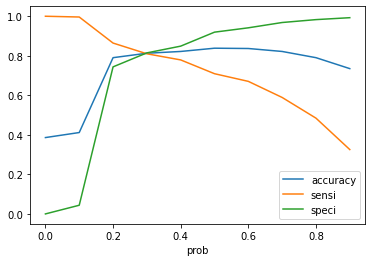

In [36]:
# Plotting the accuracy-sensitivity-specificity curve
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [37]:
pred_results["Predicted"] = pred_results.Pred_Prob.map(lambda x:1 if x > 0.3 else 0)
pred_results.head(10)

,Actuals,Pred_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
0,0,0.112268,1,1,0,0,0,0,0,0,0,0,0
1,1,0.168195,1,1,0,0,0,0,0,0,0,0,0
2,0,0.120742,1,1,0,0,0,0,0,0,0,0,0
3,0,0.109288,1,1,0,0,0,0,0,0,0,0,0
4,1,0.808896,1,1,1,1,1,1,1,1,1,0,1
5,1,0.110040,1,1,0,0,0,0,0,0,0,0,0
6,0,0.225962,1,1,1,0,0,0,0,0,0,0,0
7,0,0.114912,1,1,0,0,0,0,0,0,0,0,0
8,1,0.831483,1,1,1,1,1,1,1,1,1,0,1
9,1,0.494689,1,1,1,1,1,0,0,0,0,0,1


In [38]:
from sklearn import metrics
train_accuracy = metrics.accuracy_score(pred_results.Actuals, pred_results.Predicted)
print("Train Accuarcy : ", train_accuracy)

Train Accuarcy :  0.812874251497006


In [39]:
# Confusion Matrix
confusion_train=metrics.confusion_matrix(pred_results.Actuals,pred_results.Predicted)
confusion_train

array([[334,  76],
       [ 49, 209]], dtype=int64)

In [40]:
print("Train Sensitivity : ",round((confusion_train[1,1]/float(confusion_train[1,1]+confusion_train[1,0])),2))
print("Train Specificity : ",round((confusion_train[0,0]/float(confusion_train[0,0]+confusion_train[0,1])),2))

Train Sensitivity :  0.81
Train Specificity :  0.81


### Predicting the Test set results

In [41]:
y_test_pred = ann.predict(X_test)
y_test_pred = (y_test_pred > 0.3)
print(np.concatenate((y_test_pred.reshape(len(y_test_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

### Making the Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)
print("Test Accuracy : ", accuracy_score(y_test, y_test_pred))

[[108  31]
 [ 11  73]]
Test Accuracy :  0.8116591928251121


In [43]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [44]:
Test_Sensitivity = TP/float(TP+FN)
Test_Specificity = TN/float(TN+FP)
print("Test Sensitivity : ",round(Test_Sensitivity,2))
print("Test Specificity : ",round(Test_Specificity,2))

Test Sensitivity :  0.87
Test Specificity :  0.78


Fitting the model on Given Test Set

In [45]:
df_test = test.copy()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
df_test = df_test.drop(col_drop, axis = 1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [47]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [48]:
df_test["Age"] = df_test["Age"].fillna(df_test.groupby(["Sex"])["Age"].transform('mean'))

In [49]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [53]:
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

In [54]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [55]:
df_test["Cabin"] = df_test["Cabin"].fillna(0)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,0,Q
1,3,female,47.0,1,0,7.0000,0,S
2,2,male,62.0,0,0,9.6875,0,Q
3,3,male,27.0,0,0,8.6625,0,S
4,3,female,22.0,1,1,12.2875,0,S


In [56]:
df_test["Cabin_new"] = np.where(df_test["Cabin"] == 0, 0,1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_new
0,3,male,34.5,0,0,7.8292,0,Q,0
1,3,female,47.0,1,0,7.0000,0,S,0
2,2,male,62.0,0,0,9.6875,0,Q,0
3,3,male,27.0,0,0,8.6625,0,S,0
4,3,female,22.0,1,1,12.2875,0,S,0


In [58]:
df_test = df_test.drop("Cabin", axis = 1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,0
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,0


In [61]:
df_test_new = pd.get_dummies(df_test, columns = ["Sex", "Embarked"], drop_first = True)
df_test_new.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin_new,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,1,0
1,3,47.0,1,0,7.0000,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,1,0
3,3,27.0,0,0,8.6625,0,1,0,1
4,3,22.0,1,1,12.2875,0,0,0,1


In [62]:
X_test_ori = df_test_new.iloc[:,:].values

In [64]:
X_test_model = sc.transform(X_test_ori)

In [82]:
y_pred_ori = ann.predict(X_test_model)
y_pred_ori = (y_pred_ori > 0.5)

In [83]:
y_pred_ori

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [84]:
ann_pred = pd.DataFrame()

In [85]:
ann_pred["PassengerId"] = test["PassengerId"]
ann_pred.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [86]:
ann_pred["Survived_bool"] = y_pred_ori
ann_pred.head()

,PassengerId,Survived_bool
0,892,False
1,893,False
2,894,False
3,895,False
4,896,True


In [87]:
ann_pred["Survived"] = np.where(ann_pred["Survived_bool"] == False, 0, 1)
ann_pred.head()

,PassengerId,Survived_bool,Survived
0,892,False,0
1,893,False,0
2,894,False,0
3,895,False,0
4,896,True,1


In [88]:
ann_pred["Survived"].value_counts()

0    272
1    146
Name: Survived, dtype: int64

In [89]:
ann_pred = ann_pred.drop("Survived_bool", axis = 1)
ann_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [90]:
#ann_pred.to_csv("C:/Users/Manoj/OneDrive/Desktop/Python/Kaggle/Titanic Competition/Neural Network/ANN_Predictions1.csv", index = False)

**ANN using SMOTE**

In [158]:
train = pd.read_csv("C:/Users/Manoj/Onedrive/Desktop/Python/Kaggle/Titanic Competition/train.csv")
test = pd.read_csv("C:/Users/Manoj/Onedrive/Desktop/Python/Kaggle/Titanic Competition/test.csv")

In [159]:
df_train = train.copy()
df_train.shape

(891, 12)

In [160]:
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [161]:
col_drop = ["PassengerId", "Name", "Ticket"]
df_train = df_train.drop(col_drop, axis = 1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [162]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [163]:
df_train[df_train["Age"].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [164]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [165]:
df_train["Age"] = df_train["Age"].fillna(df_train.groupby(["Sex"])["Age"].transform('mean'))

In [166]:
df_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [167]:
df_train["Embarked"] = df_train["Embarked"].fillna('S')

In [168]:
df_train["Cabin"] = df_train["Cabin"].fillna(0)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,0,S


In [169]:
df_train["Cabin_new"] = np.where(df_train["Cabin"] == 0, 0,1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_new
0,0,3,male,22.0,1,0,7.2500,0,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,0,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,0,S,0


In [170]:
df_train = df_train.drop("Cabin", axis = 1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [171]:
df_train_new = pd.get_dummies(df_train, columns = ["Sex", "Embarked"], drop_first = True)
df_train_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_new,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [172]:
X = df_train_new.iloc[:,1:].values
y = df_train_new.iloc[:,0].values

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [174]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before : ", Counter(y_train))

smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
print("After : ", Counter(y_train_sm))

Before :  Counter({0: 410, 1: 258})
After :  Counter({0: 410, 1: 410})


In [175]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_sm)
X_test = sc.transform(X_test)

In [176]:
ann = tf.keras.models.Sequential()

In [177]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [178]:
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [179]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [180]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [181]:
ann.fit(X_train, y_train_sm, batch_size = 32, epochs = 200)

Epoch 1/200
26/26 [==============================] - 0s 862us/step - loss: 0.7204 - accuracy: 0.5110
Epoch 2/200
26/26 [==============================] - 0s 730us/step - loss: 0.6675 - accuracy: 0.6744
Epoch 3/200
26/26 [==============================] - 0s 690us/step - loss: 0.6230 - accuracy: 0.7049
Epoch 4/200
26/26 [==============================] - 0s 766us/step - loss: 0.5793 - accuracy: 0.7220
Epoch 5/200
26/26 [==============================] - 0s 755us/step - loss: 0.5351 - accuracy: 0.7610
Epoch 6/200
26/26 [==============================] - 0s 729us/step - loss: 0.5019 - accuracy: 0.7768
Epoch 7/200
26/26 [==============================] - 0s 729us/step - loss: 0.4771 - accuracy: 0.7890
Epoch 8/200
26/26 [==============================] - 0s 807us/step - loss: 0.4627 - accuracy: 0.7915
Epoch 9/200
26/26 [==============================] - 0s 729us/step - loss: 0.4510 - accuracy: 0.7976
Epoch 10/200
26/26 [==============================] - 0s 727us/step - loss: 0.4442 - accura

26/26 [==============================] - 0s 729us/step - loss: 0.3465 - accuracy: 0.8561
Epoch 160/200
26/26 [==============================] - 0s 729us/step - loss: 0.3468 - accuracy: 0.8585
Epoch 161/200
26/26 [==============================] - 0s 740us/step - loss: 0.3454 - accuracy: 0.8598
Epoch 162/200
26/26 [==============================] - 0s 700us/step - loss: 0.3458 - accuracy: 0.8537
Epoch 163/200
26/26 [==============================] - 0s 727us/step - loss: 0.3462 - accuracy: 0.8573
Epoch 164/200
26/26 [==============================] - 0s 713us/step - loss: 0.3451 - accuracy: 0.8598
Epoch 165/200
26/26 [==============================] - 0s 689us/step - loss: 0.3460 - accuracy: 0.8598
Epoch 166/200
26/26 [==============================] - 0s 729us/step - loss: 0.3440 - accuracy: 0.8585
Epoch 167/200
26/26 [==============================] - 0s 767us/step - loss: 0.3441 - accuracy: 0.8573
Epoch 168/200
26/26 [==============================] - ETA: 0s - loss: 0.2785 - accurac

In [182]:
y_pred_train = ann.predict(X_train)

In [183]:
y_train_new = y_train_sm.reshape((-1))

In [184]:
y_train_new

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [185]:
y_pred_train_new = y_pred_train.reshape((-1))

In [186]:
y_pred_train_new

array([2.30717987e-01, 3.75762880e-01, 7.85473585e-02, 1.35827601e-01,
       8.91268849e-01, 1.64957434e-01, 1.73979193e-01, 2.34243125e-01,
       9.10335660e-01, 6.26582503e-01, 6.93000197e-01, 1.93464100e-01,
       7.58907795e-02, 9.97639060e-01, 9.76661205e-01, 9.64230478e-01,
       2.30154514e-01, 1.30385160e-01, 9.85665441e-01, 2.34744281e-01,
       1.30887449e-01, 9.94721174e-01, 6.90420985e-01, 8.89034033e-01,
       2.33347744e-01, 2.34197021e-01, 8.31277370e-01, 1.37294412e-01,
       1.37796283e-01, 2.06463337e-01, 1.38055533e-01, 4.81952727e-02,
       3.47222149e-01, 8.88759017e-01, 1.15892053e-01, 1.12174124e-01,
       3.35246325e-04, 2.33347744e-01, 2.17219919e-01, 9.41197574e-02,
       4.46941733e-01, 5.51342070e-02, 3.17255080e-01, 7.03644454e-01,
       4.21083450e-01, 4.30544853e-01, 9.93463337e-01, 2.92549431e-02,
       1.79439366e-01, 6.55352652e-01, 8.84055436e-01, 3.17839086e-01,
       1.12467527e-01, 2.33492464e-01, 1.67008519e-01, 8.88815284e-01,
      

In [187]:
pred_results = pd.DataFrame({'Actuals' : y_train_new, 'Pred_Prob' : y_pred_train_new})
pred_results.head()

,Actuals,Pred_Prob
0,0,0.230718
1,1,0.375763
2,0,0.078547
3,0,0.135828
4,1,0.891269


In [188]:
num = [float(x)/10 for x in range(10)]
for i in num:
    pred_results[i] = pred_results.Pred_Prob.map(lambda x:1 if x > i else 0)
pred_results.head(10)

,Actuals,Pred_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.230718,1,1,1,0,0,0,0,0,0,0
1,1,0.375763,1,1,1,1,0,0,0,0,0,0
2,0,0.078547,1,0,0,0,0,0,0,0,0,0
3,0,0.135828,1,1,0,0,0,0,0,0,0,0
4,1,0.891269,1,1,1,1,1,1,1,1,1,0
5,1,0.164957,1,1,0,0,0,0,0,0,0,0
6,0,0.173979,1,1,0,0,0,0,0,0,0,0
7,0,0.234243,1,1,1,0,0,0,0,0,0,0
8,1,0.910336,1,1,1,1,1,1,1,1,1,1
9,1,0.626583,1,1,1,1,1,1,1,0,0,0


In [189]:
# Creating the probability dataframe

from sklearn import metrics

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(pred_results.Actuals, pred_results[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.620732  0.992683  0.248780
0.2   0.2  0.763415  0.943902  0.582927
0.3   0.3  0.840244  0.892683  0.787805
0.4   0.4  0.862195  0.863415  0.860976
0.5   0.5  0.867073  0.824390  0.909756
0.6   0.6  0.862195  0.787805  0.936585
0.7   0.7  0.837805  0.717073  0.958537
0.8   0.8  0.812195  0.656098  0.968293
0.9   0.9  0.757317  0.531707  0.982927


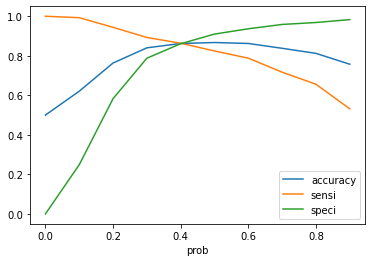

In [190]:
# Plotting the accuracy-sensitivity-specificity curve
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [191]:
pred_results["Predicted"] = pred_results.Pred_Prob.map(lambda x:1 if x > 0.5 else 0)
pred_results.head(10)

,Actuals,Pred_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
0,0,0.230718,1,1,1,0,0,0,0,0,0,0,0
1,1,0.375763,1,1,1,1,0,0,0,0,0,0,0
2,0,0.078547,1,0,0,0,0,0,0,0,0,0,0
3,0,0.135828,1,1,0,0,0,0,0,0,0,0,0
4,1,0.891269,1,1,1,1,1,1,1,1,1,0,1
5,1,0.164957,1,1,0,0,0,0,0,0,0,0,0
6,0,0.173979,1,1,0,0,0,0,0,0,0,0,0
7,0,0.234243,1,1,1,0,0,0,0,0,0,0,0
8,1,0.910336,1,1,1,1,1,1,1,1,1,1,1
9,1,0.626583,1,1,1,1,1,1,1,0,0,0,1


In [192]:
from sklearn import metrics
train_accuracy = metrics.accuracy_score(pred_results.Actuals, pred_results.Predicted)
print("Train Accuarcy : ", train_accuracy)

Train Accuarcy :  0.8670731707317073


In [193]:
# Confusion Matrix
confusion_train=metrics.confusion_matrix(pred_results.Actuals,pred_results.Predicted)
confusion_train

array([[373,  37],
       [ 72, 338]], dtype=int64)

In [194]:
print("Train Sensitivity : ",round((confusion_train[1,1]/float(confusion_train[1,1]+confusion_train[1,0])),2))
print("Train Specificity : ",round((confusion_train[0,0]/float(confusion_train[0,0]+confusion_train[0,1])),2))

Train Sensitivity :  0.82
Train Specificity :  0.91


### Predicting the Test set results

In [195]:
y_test_pred = ann.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(np.concatenate((y_test_pred.reshape(len(y_test_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

### Making the Confusion Matrix

In [196]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)
print("Test Accuracy : ", accuracy_score(y_test, y_test_pred))

[[117  22]
 [ 21  63]]
Test Accuracy :  0.8071748878923767


In [197]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [198]:
Test_Sensitivity = TP/float(TP+FN)
Test_Specificity = TN/float(TN+FP)
print("Test Sensitivity : ",round(Test_Sensitivity,2))
print("Test Specificity : ",round(Test_Specificity,2))

Test Sensitivity :  0.75
Test Specificity :  0.84


Fitting the model on Given Test Set

In [199]:
df_test = test.copy()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [200]:
df_test = df_test.drop(col_drop, axis = 1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [201]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [202]:
df_test["Age"] = df_test["Age"].fillna(df_test.groupby(["Sex"])["Age"].transform('mean'))

In [203]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [204]:
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

In [205]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [206]:
df_test["Cabin"] = df_test["Cabin"].fillna(0)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,0,Q
1,3,female,47.0,1,0,7.0000,0,S
2,2,male,62.0,0,0,9.6875,0,Q
3,3,male,27.0,0,0,8.6625,0,S
4,3,female,22.0,1,1,12.2875,0,S


In [207]:
df_test["Cabin_new"] = np.where(df_test["Cabin"] == 0, 0,1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_new
0,3,male,34.5,0,0,7.8292,0,Q,0
1,3,female,47.0,1,0,7.0000,0,S,0
2,2,male,62.0,0,0,9.6875,0,Q,0
3,3,male,27.0,0,0,8.6625,0,S,0
4,3,female,22.0,1,1,12.2875,0,S,0


In [208]:
df_test = df_test.drop("Cabin", axis = 1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,0
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,0


In [209]:
df_test_new = pd.get_dummies(df_test, columns = ["Sex", "Embarked"], drop_first = True)
df_test_new.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin_new,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,1,0
1,3,47.0,1,0,7.0000,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,1,0
3,3,27.0,0,0,8.6625,0,1,0,1
4,3,22.0,1,1,12.2875,0,0,0,1


In [210]:
X_test_ori = df_test_new.iloc[:,:].values

In [211]:
X_test_model = sc.transform(X_test_ori)

In [212]:
y_pred_ori = ann.predict(X_test_model)
y_pred_ori = (y_pred_ori > 0.5)

In [213]:
y_pred_ori

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

In [214]:
ann_pred = pd.DataFrame()

In [215]:
ann_pred["PassengerId"] = test["PassengerId"]
ann_pred.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [216]:
ann_pred["Survived_bool"] = y_pred_ori
ann_pred.head()

,PassengerId,Survived_bool
0,892,False
1,893,False
2,894,False
3,895,False
4,896,False


In [217]:
ann_pred["Survived"] = np.where(ann_pred["Survived_bool"] == False, 0, 1)
ann_pred.head()

,PassengerId,Survived_bool,Survived
0,892,False,0
1,893,False,0
2,894,False,0
3,895,False,0
4,896,False,0


In [218]:
ann_pred["Survived"].value_counts()

0    250
1    168
Name: Survived, dtype: int64

In [219]:
ann_pred = ann_pred.drop("Survived_bool", axis = 1)
ann_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [220]:
#ann_pred.to_csv("C:/Users/Manoj/OneDrive/Desktop/Python/Kaggle/Titanic Competition/Neural Network/ANN_Predictions3.csv", index = False)